<a href="https://colab.research.google.com/github/lupalon/Mareas2022/blob/main/Tercera_Parte.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

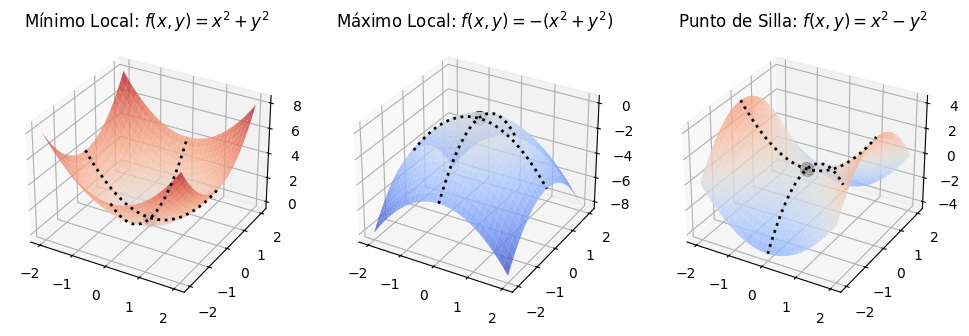

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from mpl_toolkits.mplot3d import Axes3D

# Definir funciones
def f_min(x, y):
    return x**2 + y**2

def f_max(x, y):
    return -(x**2 + y**2)

def f_silla(x, y):
    return x**2 - y**2

# Crear malla de valores
x = np.linspace(-2, 2, 30)
y = np.linspace(-2, 2, 30)
X, Y = np.meshgrid(x, y)
Z_min = f_min(X, Y)
Z_max = f_max(X, Y)
Z_silla = f_silla(X, Y)

# Encontrar el valor máximo absoluto para normalizar la escala de color
max_abs_Z = max(np.abs(Z_min).max(), np.abs(Z_max).max(), np.abs(Z_silla).max())
norm = mcolors.Normalize(vmin=-max_abs_Z, vmax=max_abs_Z)

# Crear cortes con los planos xz e yz
y0 = np.zeros_like(x)
x0 = np.zeros_like(y)

Z_min_xz = f_min(x, y0)
Z_min_yz = f_min(x0, y)

Z_max_xz = f_max(x, y0)
Z_max_yz = f_max(x0, y)

Z_silla_xz = f_silla(x, y0)
Z_silla_yz = f_silla(x0, y)

# Crear la figura
fig = plt.figure(figsize=(12, 4))

# Mínimo Local
ax1 = fig.add_subplot(131, projection='3d')
ax1.plot_surface(X, Y, Z_min, cmap='coolwarm', norm=norm, alpha=0.8)
ax1.plot(x, y0, Z_min_xz, color='k', linewidth=2, ls=':', label="Corte xz", zorder=10)
ax1.plot(x0, y, Z_min_yz, color='k', linewidth=2, ls=':', label="Corte yz", zorder=10)
ax1.set_title("Mínimo Local: $f(x,y) = x^2 + y^2$")
ax1.scatter(0, 0, f_min(0, 0), color="black", s=100, label="(0,0)", zorder=15)

# Máximo Local
ax2 = fig.add_subplot(132, projection='3d')
ax2.plot_surface(X, Y, Z_max, cmap='coolwarm', norm=norm, alpha=0.8)
ax2.plot(x, y0, Z_max_xz, color='k', linewidth=2, ls=':', label="Corte xz", zorder=10)
ax2.plot(x0, y, Z_max_yz, color='k', linewidth=2, ls=':', label="Corte yz", zorder=10)
ax2.set_title("Máximo Local: $f(x,y) = - (x^2 + y^2)$")
ax2.scatter(0, 0, f_max(0, 0), color="black", s=100, label="(0,0)", zorder=15)

# Punto de Silla
ax3 = fig.add_subplot(133, projection='3d')
ax3.plot_surface(X, Y, Z_silla, cmap='coolwarm', norm=norm, alpha=0.8)
ax3.plot(x, y0, Z_silla_xz, color='k', linewidth=2, ls=':', label="Corte xz", zorder=10)
ax3.plot(x0, y, Z_silla_yz, color='k', linewidth=2, ls=':', label="Corte yz", zorder=10)
ax3.set_title("Punto de Silla: $f(x,y) = x^2 - y^2$")
ax3.scatter(0, 0, f_silla(0, 0), color="black", s=100, label="(0,0)", zorder=15)

# Agregar barra de color
#cbar = fig.colorbar(plt.cm.ScalarMappable(norm=norm, cmap="coolwarm"), ax=[ax1, ax2, ax3], orientation='horizontal', fraction=0.05, pad=0.1)
#cbar.set_label("Valores de $f(x,y)$")

plt.show()



# Curvas de Nivel y restricciones


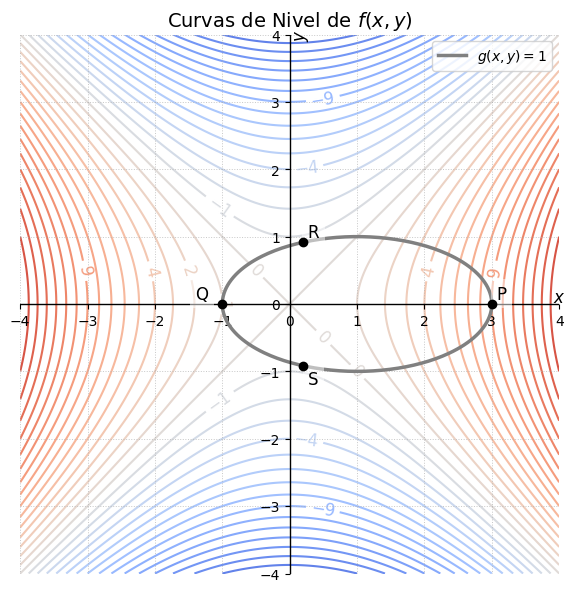

In [2]:
import numpy as np
import matplotlib.pyplot as plt
# Definir la función f(x, y)
def f(x, y):
    return x**2 - y**2

# Crear la malla para graficar
x = np.linspace(-4, 4, 400)
y = np.linspace(-4, 4, 400)
X, Y = np.meshgrid(x, y)
Z = f(X, Y)

# Definir la restricción: una elipse
theta = np.linspace(0, 2*np.pi, 300)
x_circle = 2 * np.cos(theta) + 1  # Centro en (1,0)
y_circle = np.sin(theta)           # Radio en y = 1

# Puntos de tangencia
tangency_points = {
    "P": (3, 0),
    "Q": (-1, 0),
    "R": (1/5, np.sqrt(21)/5),
    "S": (1/5, -np.sqrt(21)/5)
}

# Crear figura y ejes
fig, ax = plt.subplots(figsize=(7, 7))

# Graficar las curvas de nivel
contours = ax.contour(X, Y, Z, levels=np.arange(-20, 20, 1), cmap='coolwarm',zorder=-1)
#ax.clabel(contours, inline=True, fontsize=12)
# Colocar etiquetas en posiciones más claras y cercanas al centro
manual_positions = [(-1.5, 0.5),(-1, 0),(-0.5,0.5),(0.5,-0.5), (1, -1), (2, 0.5), (-2, 0.5),(3,0.5),(-3,0.5),(-1,1.5),(-1,-1.5),(0.25,-2),(0.25,2),(0.5,3),(0.5,-3)]  # Ajusta según el gráfico
ax.clabel(contours, inline=True, fontsize=12, manual=manual_positions)

# Graficar la elipse de restricción
ax.plot(x_circle, y_circle, 'grey', linewidth=2.5, label='$g(x, y) = 1$')
ax.axhline(0,color='k',linewidth=1)
ax.axvline(0,color='k',linewidth=1)
# Graficar los puntos de tangencia
for label, (x_t, y_t) in tangency_points.items():
    ax.scatter(x_t, y_t, color='k', zorder=3)
    dx = 0.15 if x_t > 0 else -0.3  # Ajuste en x
    dy = 0.15 if y_t >= 0 else -0.2   # Ajuste en y
    ax.text(x_t + dx, y_t + dy, label, fontsize=12, color='black',
            ha='center', va='center', bbox=dict(facecolor='white', alpha=0.5, edgecolor='none'), zorder=2)

# Ajustar proporciones y ejes en el centro
ax.set_xlim([-4, 4])
ax.set_ylim([-4, 4])
ax.set_aspect('equal')

# Centrar los ejes en el origen
ax.spines['left'].set_position('zero')
ax.spines['bottom'].set_position('zero')
ax.spines['right'].set_color('none')
ax.spines['left'].set_color('black')
ax.spines['bottom'].set_color('black')
ax.spines['top'].set_color('none')

# Eliminar el borde del gráfico
ax.set_frame_on(False)
ax.grid(True, linestyle=':', linewidth=0.7, alpha=0.7)
# Etiquetas y título
ax.set_xlabel('$x$', fontsize=12)
ax.set_ylabel('$y$', fontsize=12)
ax.xaxis.set_label_coords(1, 0.53)
ax.yaxis.set_label_coords(0.54, 1)
ax.set_title('Curvas de Nivel de $f(x, y)$', fontsize=14)
ax.legend(loc='upper right')

# Eliminar espacios en blanco
plt.margins(0)
plt.savefig('tercer_recu.png',dpi=300)
# Mostrar el gráfico
plt.show()



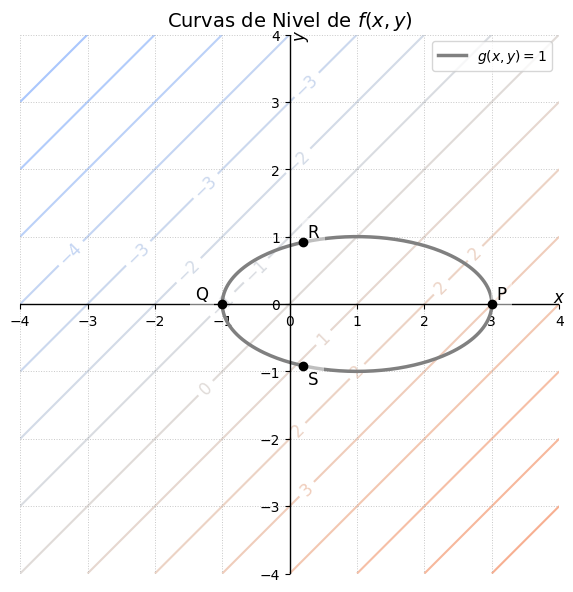

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Definir la función f(x, y)
def f(x, y):
    return x - y

# Crear la malla para graficar
x = np.linspace(-4, 4, 400)
y = np.linspace(-4, 4, 400)
X, Y = np.meshgrid(x, y)
Z = f(X, Y)

# Definir la restricción: una elipse
theta = np.linspace(0, 2*np.pi, 300)
x_circle = 2 * np.cos(theta) + 1  # Centro en (1,0)
y_circle = np.sin(theta)           # Radio en y = 1

# Puntos de tangencia
tangency_points = {
    "P": (3, 0),
    "Q": (-1, 0),
    "R": (1/5, np.sqrt(21)/5),
    "S": (1/5, -np.sqrt(21)/5)
}

# Crear figura y ejes
fig, ax = plt.subplots(figsize=(7, 7))

# Graficar las curvas de nivel
contours = ax.contour(X, Y, Z, levels=np.arange(-20, 20, 1), cmap='coolwarm',zorder=-1)
#ax.clabel(contours, inline=True, fontsize=12)
# Colocar etiquetas en posiciones más claras y cercanas al centro
manual_positions = [(-1.5, 0.5),(-1, 0),(-0.5,0.5),(0.5,-0.5), (1, -1), (2, 0.5), (-2, 0.5),(3,0.5),(-3,0.5),(-1,1.5),(-1,-1.5),(0.25,-2),(0.25,2),(0.5,3),(0.5,-3)]  # Ajusta según el gráfico
ax.clabel(contours, inline=True, fontsize=12, manual=manual_positions)

# Graficar la elipse de restricción
ax.plot(x_circle, y_circle, 'grey', linewidth=2.5, label='$g(x, y) = 1$')
ax.axhline(0,color='k',linewidth=1)
ax.axvline(0,color='k',linewidth=1)
# Graficar los puntos de tangencia
for label, (x_t, y_t) in tangency_points.items():
    ax.scatter(x_t, y_t, color='k', zorder=3)
    dx = 0.15 if x_t > 0 else -0.3  # Ajuste en x
    dy = 0.15 if y_t >= 0 else -0.2   # Ajuste en y
    ax.text(x_t + dx, y_t + dy, label, fontsize=12, color='black',
            ha='center', va='center', bbox=dict(facecolor='white', alpha=0.5, edgecolor='none'), zorder=2)

# Ajustar proporciones y ejes en el centro
ax.set_xlim([-4, 4])
ax.set_ylim([-4, 4])
ax.set_aspect('equal')

# Centrar los ejes en el origen
ax.spines['left'].set_position('zero')
ax.spines['bottom'].set_position('zero')
ax.spines['right'].set_color('none')
ax.spines['left'].set_color('black')
ax.spines['bottom'].set_color('black')
ax.spines['top'].set_color('none')

# Eliminar el borde del gráfico
ax.set_frame_on(False)
ax.grid(True, linestyle=':', linewidth=0.7, alpha=0.7)
# Etiquetas y título
ax.set_xlabel('$x$', fontsize=12)
ax.set_ylabel('$y$', fontsize=12)
ax.xaxis.set_label_coords(1, 0.53)
ax.yaxis.set_label_coords(0.54, 1)
ax.set_title('Curvas de Nivel de $f(x, y)$', fontsize=14)
ax.legend(loc='upper right')

# Eliminar espacios en blanco
plt.margins(0)
plt.savefig('tercer_recu.png',dpi=300)
# Mostrar el gráfico
plt.show()


<ipython-input-110-551918f13aed>:66: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(loc='upper right')


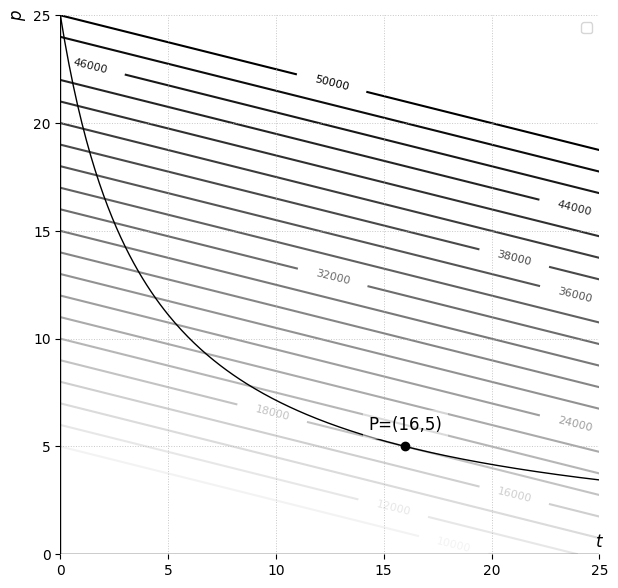

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Definir la función f(x, y)
def f(x, y):
    return 500*x+2000*y

# Crear la malla para graficar
x = np.linspace(0, 40, 400)
y = np.linspace(0, 40, 400)
X, Y = np.meshgrid(x, y)
Z = f(X, Y)

# Definir la restricció
g=1000/(40+10*x)
h=1500/(40+10*x)
# Puntos de tangencia
tangency_points = {
    "P=(16,5)": (16, 5)
}

# Crear figura y ejes
fig, ax = plt.subplots(figsize=(7, 7))

# Graficar las curvas de nivel
contours = ax.contour(X, Y, Z, levels=np.arange(8000,51000,2000),cmap='grey_r',zorder=-1)
ax.clabel(contours, inline=True, fontsize=8)
# Colocar etiquetas en posiciones más claras y cercanas al centro
#manual_positions = [(-1.5, 0.5),(-1, 0),(-0.5,0.5),(0.5,-0.5), (1, -1), (2, 0.5), (-2, 0.5),(3,0.5),(-3,0.5),(-1,1.5),(-1,-1.5),(0.25,-2),(0.25,2),(0.5,3),(0.5,-3)]  # Ajusta según el gráfico
#ax.clabel(contours, inline=True, fontsize=12, manual=manual_positions)

# Graficar la elipse de restricción
ax.plot(x,g, 'black', linewidth=1)#, label='$V(t, p) = 1000$')
#ax.plot(x,h, 'black', linewidth=1, label='$V(t, p) = 1000$')

ax.axhline(0,color='k',linewidth=1)
ax.axvline(0,color='k',linewidth=1)
# Graficar los puntos de tangencia
for label, (x_t, y_t) in tangency_points.items():
    ax.scatter(x_t, y_t, color='k', zorder=3)
    ax.text(x_t, y_t + 1, label, fontsize=12, color='black',
            ha='center', va='center', bbox=dict(facecolor='white', alpha=0.5, edgecolor='none'), zorder=2)

# Ajustar proporciones y ejes en el centro
ax.set_xlim([0, 25])
ax.set_ylim([0, 25])
ax.set_aspect('equal')

# Centrar los ejes en el origen
ax.spines['left'].set_position('zero')
ax.spines['bottom'].set_position('zero')
ax.spines['right'].set_color('none')
ax.spines['left'].set_color('black')
ax.spines['bottom'].set_color('black')
ax.spines['top'].set_color('none')

# Eliminar el borde del gráfico
ax.set_frame_on(False)
ax.grid(True, linestyle=':', linewidth=0.7, alpha=0.7,which='both')
# Etiquetas y título
ax.set_xlabel('$t$', fontsize=12)
ax.set_ylabel('$p$', fontsize=12)
ax.xaxis.set_label_coords(1, 0.04)
ax.yaxis.set_label_coords(-0.06, 1)
#ax.set_title('Curvas de Nivel de $f(x, y)$', fontsize=14)
ax.legend(loc='upper right')

# Eliminar espacios en blanco
plt.margins(0)
plt.savefig('tercer_recu.png',dpi=300)
# Mostrar el gráfico
plt.show()



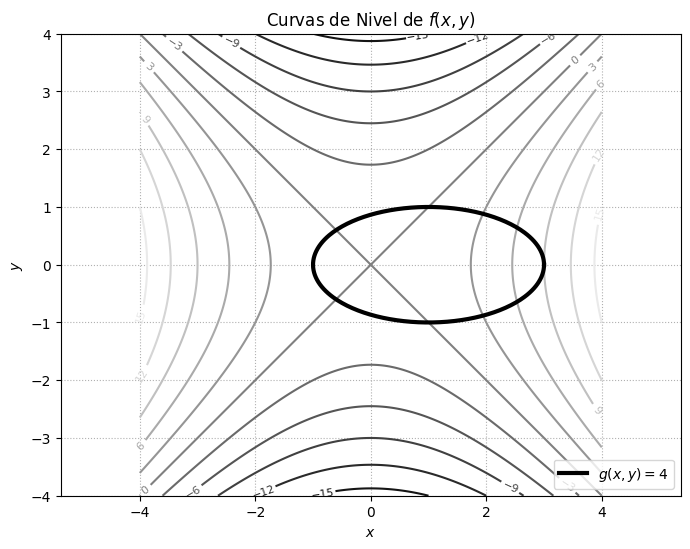

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Definir la función f(x, y)
def f(x, y):
#    return (x + 1)**2 + (y - 1)**2 + 1 #Tercer Parcial 2025
     #return 6*x+4*y+14
     return x**2-y**2
# Crear la malla para graficar
x = np.linspace(-4, 4, 400)
y = np.linspace(-4, 4, 400)
X, Y = np.meshgrid(x, y)
Z = f(X, Y)

# Definir la restricción g(x, y) = 4, que es una circunferencia
theta = np.linspace(0, 2*np.pi, 300)
x_circle = 2* np.cos(theta)+1
y_circle = 1 * np.sin(theta)
#g=2*x+3*y-6

tangency_points = {
    "P": (np.sqrt(2), -np.sqrt(2)),
    "Q": (-np.sqrt(2), np.sqrt(2)),
    "R": (np.sqrt(2), np.sqrt(2)),
    "S": (-np.sqrt(2), -np.sqrt(2))
}

# Graficar las curvas de nivel de f(x, y)
plt.figure(figsize=(8, 6))
#contours = plt.contour(X, Y, Z, levels=[0,1,2,4,6,8,10,12,14,16,18,20,22,24,26,28,30], cmap='gray')
contours = plt.contour(X, Y, Z, levels=10,cmap='gray')
plt.clabel(contours, inline=True, fontsize=8)
#plt.scatter(-1,1,3,color='k')
# Graficar la restricción
plt.plot(x_circle, y_circle, 'k-', linewidth=3, label='$g(x, y) = 4$')
#plt.plot(x, g, 'k-', linewidth=3, label='$g(x, y) = 3$')
# Graficar los puntos de tangencia
"""
for label, (x_t, y_t) in tangency_points.items():
    plt.scatter(x_t, y_t, color='k', zorder=3)
     # Ajuste de posición de etiquetas según la ubicación
    dx = 0.15 if x_t > 0 else -0.3  # Desplazamiento en x
    dy = 0.1 if y_t > 0 else -0.2  # Desplazamiento en y
    plt.text(x_t + dx, y_t + dy, label, fontsize=12, color='black',
             ha='center', va='center', bbox=dict(facecolor='white', alpha=0.4, edgecolor='none'),zorder=2)
"""
# Ajustar la proporción de los ejes
plt.xlim([-4,4])
plt.axis('equal')
#plt.ylim([0,10])
# Etiquetas y título
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.title('Curvas de Nivel de $f(x, y)$')
plt.legend(loc='lower right')
plt.grid(True,ls=':')
plt.show()


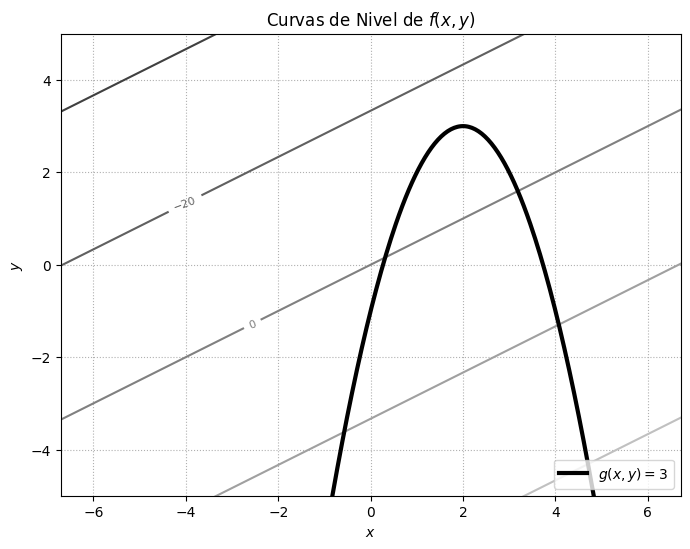

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Definir la función f(x, y)
def f(x, y):
#    return (x + 1)**2 + (y - 1)**2 + 1 #Tercer Parcial 2025
     return 3*x-6*y
# Crear la malla para graficar
x = np.linspace(-7, 7, 400)
y = np.linspace(-7, 7, 400)
X, Y = np.meshgrid(x, y)
Z = f(X, Y)

# Definir la restricción g(x, y) = 4, que es una circunferencia
#theta = np.linspace(0, 2*np.pi, 300)
#x_circle = 2 * np.cos(theta)
#y_circle = 2 * np.sin(theta)
g=-x**2+4*x-1

tangency_points = {
    "P": (np.sqrt(2), -np.sqrt(2)),
    "Q": (-np.sqrt(2), np.sqrt(2)),
    "R": (np.sqrt(2), np.sqrt(2)),
    "S": (-np.sqrt(2), -np.sqrt(2))
}

# Graficar las curvas de nivel de f(x, y)
plt.figure(figsize=(8, 6))
#contours = plt.contour(X, Y, Z, levels=[0,1,2,4,6,8,10,12,14,16,18,20,22,24,26,28,30], cmap='gray')
contours = plt.contour(X, Y, Z, cmap='gray')
plt.clabel(contours, inline=True, fontsize=8)
#plt.scatter(-1,1,3,color='k')
# Graficar la restricción
#plt.plot(x_circle, y_circle, 'k-', linewidth=3, label='$g(x, y) = 4$')
plt.plot(x, g, 'k-', linewidth=3, label='$g(x, y) = 3$')
# Graficar los puntos de tangencia
"""
for label, (x_t, y_t) in tangency_points.items():
    plt.scatter(x_t, y_t, color='k', zorder=3)
     # Ajuste de posición de etiquetas según la ubicación
    dx = 0.15 if x_t > 0 else -0.3  # Desplazamiento en x
    dy = 0.1 if y_t > 0 else -0.2  # Desplazamiento en y
    plt.text(x_t + dx, y_t + dy, label, fontsize=12, color='black',
             ha='center', va='center', bbox=dict(facecolor='white', alpha=0.4, edgecolor='none'),zorder=2)
"""
# Ajustar la proporción de los ejes
plt.axis('equal')
plt.xlim([-5,5])
plt.ylim([-5,5])
# Etiquetas y título
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.title('Curvas de Nivel de $f(x, y)$')
plt.legend(loc='lower right')
plt.grid(True,ls=':')
plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Definir funciones
def f_min(x, y):
    return x**2 + y**2

def f_max(x, y):
    return -(x**2 + y**2)

def f_silla(x, y):
    return x**2 - y**2

# Crear malla de valores
x = np.linspace(-2, 2, 30)
y = np.linspace(-2, 2, 30)
X, Y = np.meshgrid(x, y)

Z_min = f_min(X, Y)
Z_max = f_max(X, Y)
Z_silla = f_silla(X, Y)

# Puntos para el gradiente
px, py = np.meshgrid(np.linspace(-2, 2, 10), np.linspace(-2, 2, 10))
grad_x_min = 2 * px
grad_y_min = 2 * py

grad_x_max = -2 * px
grad_y_max = -2 * py

grad_x_silla = 2 * px
grad_y_silla = -2 * py

max_abs_Z = max(np.abs(Z_min).max(), np.abs(Z_max).max(), np.abs(Z_silla).max())
norm = mcolors.Normalize(vmin=-max_abs_Z, vmax=max_abs_Z)

# Crear la figura
fig, axes = plt.subplots(1, 3, figsize=(12, 4))

# Función para graficar curvas de nivel
def plot_contours(ax, X, Y, Z, grad_x, grad_y, title):
    contour = ax.contour(X, Y, Z, levels=10, cmap="coolwarm",norm=norm)
    ax.clabel(contour, inline=True, fontsize=8)

    # Dibujar el punto crítico
    ax.scatter(0, 0, color='black', s=100, label="(0,0)")

    # Dibujar el gradiente en varios puntos
    #ax.quiver(px, py, grad_x, grad_y, color='k', angles='xy', scale_units='xy', scale=10, width=0.005,zorder=10)

    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_title(title)
#    ax.legend()

# Mínimo Local
plot_contours(axes[0], X, Y, Z_min, grad_x_min, grad_y_min, "Mínimo Local: $f(x,y) = x^2 + y^2$")

# Máximo Local
plot_contours(axes[1], X, Y, Z_max, grad_x_max, grad_y_max, "Máximo Local: $f(x,y) = - (x^2 + y^2)$")

# Punto de Silla
plot_contours(axes[2], X, Y, Z_silla, grad_x_silla, grad_y_silla, "Punto de Silla: $f(x,y) = x^2 - y^2$")

plt.tight_layout()
plt.show()


NameError: name 'mcolors' is not defined

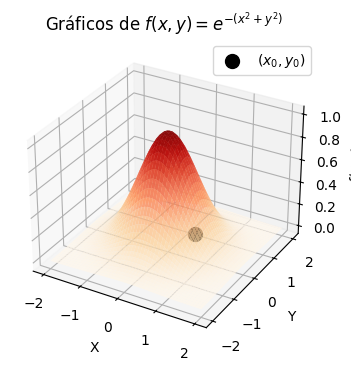

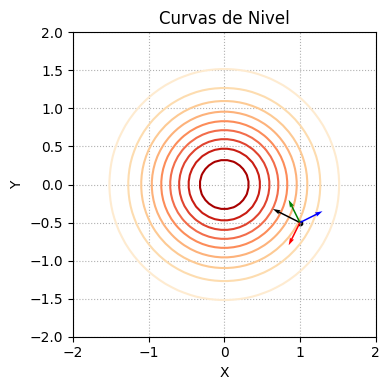

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from mpl_toolkits.mplot3d import Axes3D

# Definir la nueva función f(x, y)
def f(x, y):
    return np.exp(-(x**2 + y**2))

# Crear malla de valores
x = np.linspace(-2, 2, 50)
y = np.linspace(-2, 2, 50)
X, Y = np.meshgrid(x, y)
Z = f(X, Y)

# Punto donde evaluamos el gradiente
x0, y0 = (1, -0.5)

# Calcular el gradiente ∇f = (∂f/∂x, ∂f/∂y)
grad_f = np.array([
    -2 * x0 * np.exp(-(x0**2 + y0**2)),
    -2 * y0 * np.exp(-(x0**2 + y0**2))
])

grad_f=grad_f/np.linalg.norm(grad_f)

# Definir dos vectores direccionales arbitrarios
v1 = np.array([1, 0.5]) / np.linalg.norm([1, 0.5])  # Vector unitario
v2 = np.array([-0.5, 1]) / np.linalg.norm([-0.5, 1])
v3 = np.array([2 * y0 * np.exp(-(x0**2 + y0**2)), -2 * x0 * np.exp(-(x0**2 + y0**2))]) / np.linalg.norm([2 * y0 * np.exp(-(x0**2 + y0**2)), -2 * x0 * np.exp(-(x0**2 + y0**2))])

# Crear figura
# Crear la figura
fig = plt.figure(figsize=(4, 4))
ax3d = fig.add_subplot(111, projection='3d')
# ----- Gráfico 3D -----
ax3d.plot_surface(X, Y, Z, cmap="OrRd", alpha=0.8)
ax3d.scatter(x0, y0, f(x0, y0), color="black", s=100, label="$(x_0, y_0)$")
ax3d.set_xlabel("X")
ax3d.set_ylabel("Y")
ax3d.set_zlabel("f(x,y)")
ax3d.set_title("Gráficos de $f(x,y) = e^{-(x^2 + y^2)}$")
ax3d.legend()

# ----- Gráfico de Curvas de Nivel -----
fig, ax = plt.subplots(1, 1, figsize=(4,4))
ax.contour(X, Y, Z, levels=10, cmap="OrRd", norm=mcolors.Normalize(vmin=0, vmax=1))
#ax[1].contour(X, Y, Z, levels=20, colors="black", linewidths=0.5)
ax.scatter(x0, y0, color="black", s=10, label="Punto $(x_0, y_0)$")

# Dibujar el gradiente y los vectores direccionales
ax.quiver(x0, y0, grad_f[0], grad_f[1], color='k', angles='xy', scale_units='xy', scale=2.5, width=0.005, label="∇f",zorder=10)
ax.quiver(x0, y0, v1[0], v1[1], color='blue', angles='xy', scale_units='xy', scale=3, width=0.005, label="v1",zorder=10)
ax.quiver(x0, y0, v2[0], v2[1], color='green', angles='xy', scale_units='xy', scale=3, width=0.005, label="v2",zorder=10)
ax.quiver(x0, y0, v3[0], v3[1], color='red', angles='xy', scale_units='xy', scale=3, width=0.005, label="v3",zorder=10)


ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_title("Curvas de Nivel")
ax.grid(ls=':')
#ax.legend()

plt.tight_layout()
plt.show()


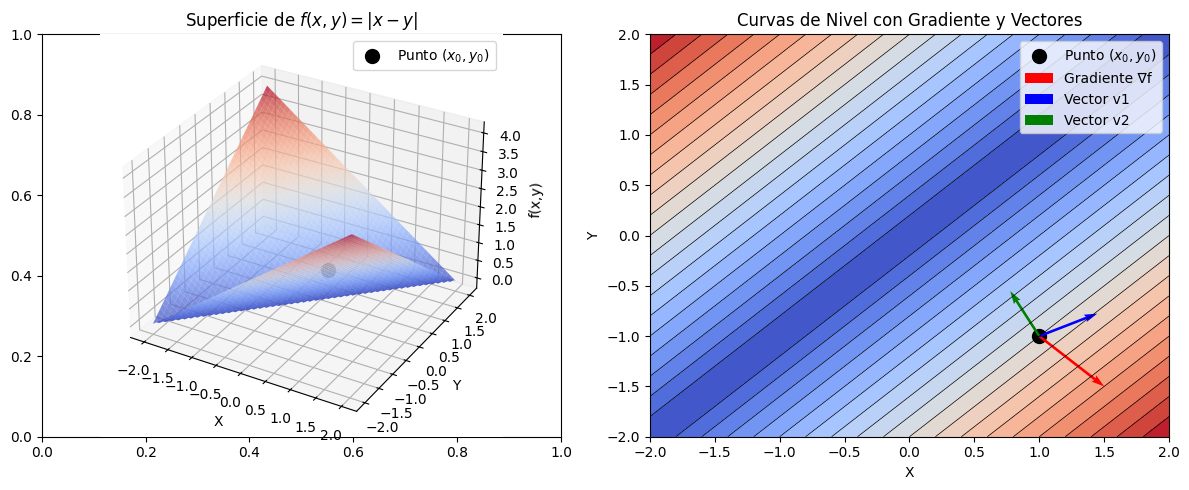

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from mpl_toolkits.mplot3d import Axes3D

# Definir la función f(x, y)
def f(x, y):
    return np.abs(x - y)

# Crear malla de valores
x = np.linspace(-2, 2, 50)
y = np.linspace(-2, 2, 50)
X, Y = np.meshgrid(x, y)
Z = f(X, Y)

# Punto donde evaluamos el gradiente
x0, y0 = (1, -1)

# Cálculo del gradiente (donde es diferenciable)
if x0 != y0:
    grad_f = np.array([np.sign(x0 - y0), -np.sign(x0 - y0)])  # (1, -1) o (-1, 1)
else:
    grad_f = np.array([np.nan, np.nan])  # No definido en x=y

# Definir dos vectores direccionales arbitrarios
v1 = np.array([1, 0.5]) / np.linalg.norm([1, 0.5])  # Vector unitario
v2 = np.array([-0.5, 1]) / np.linalg.norm([-0.5, 1])

# Crear figura
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

# ----- Gráfico 3D -----
ax3d = fig.add_subplot(121, projection='3d')
ax3d.plot_surface(X, Y, Z, cmap="coolwarm", alpha=0.7)
ax3d.scatter(x0, y0, f(x0, y0), color="black", s=100, label="Punto $(x_0, y_0)$")
ax3d.set_xlabel("X")
ax3d.set_ylabel("Y")
ax3d.set_zlabel("f(x,y)")
ax3d.set_title("Superficie de $f(x,y) = |x - y|$")
ax3d.legend()

# ----- Gráfico de Curvas de Nivel -----
ax[1].contourf(X, Y, Z, levels=20, cmap="coolwarm", norm=mcolors.Normalize(vmin=0, vmax=np.max(Z)))
ax[1].contour(X, Y, Z, levels=20, colors="black", linewidths=0.5)
ax[1].scatter(x0, y0, color="black", s=100, label="Punto $(x_0, y_0)$")

# Dibujar el gradiente y los vectores direccionales
ax[1].quiver(x0, y0, grad_f[0], grad_f[1], color='red', angles='xy', scale_units='xy', scale=2, width=0.005, label="Gradiente ∇f")
ax[1].quiver(x0, y0, v1[0], v1[1], color='blue', angles='xy', scale_units='xy', scale=2, width=0.005, label="Vector v1")
ax[1].quiver(x0, y0, v2[0], v2[1], color='green', angles='xy', scale_units='xy', scale=2, width=0.005, label="Vector v2")

ax[1].set_xlabel("X")
ax[1].set_ylabel("Y")
ax[1].set_title("Curvas de Nivel con Gradiente y Vectores")
ax[1].legend()

plt.tight_layout()
plt.show()


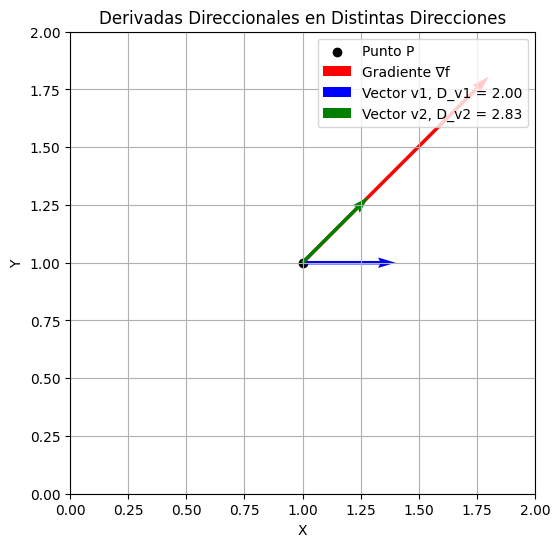

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Definir la función f(x, y) y su gradiente
def f(x, y):
    return x**2 + y**2  # Ejemplo simple de función

def grad_f(x, y):
    return np.array([2*x, 2*y])  # Gradiente de f(x, y)

# Punto P donde evaluamos
P = np.array([1, 1])
grad = grad_f(*P)

# Definir dos vectores de dirección unitarios
v1 = np.array([1, 0])  # Dirección en eje x
v2 = np.array([1, 1]) / np.sqrt(2)  # Dirección en 45°

# Calcular derivadas direccionales
D_v1 = np.dot(grad, v1)  # Producto punto con el gradiente
D_v2 = np.dot(grad, v2)

# Crear el gráfico
fig, ax = plt.subplots(figsize=(6,6))
ax.set_xlim(0, 2)
ax.set_ylim(0, 2)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.grid()

# Dibujar el punto P
ax.scatter(*P, color='black', label='Punto P')

# Dibujar el gradiente
ax.quiver(*P, *grad, color='red', scale=5, label='Gradiente ∇f')

# Dibujar los dos vectores dirección
ax.quiver(*P, *v1, color='blue', scale=5, label=f'Vector v1, D_v1 = {D_v1:.2f}')
ax.quiver(*P, *v2, color='green', scale=5, label=f'Vector v2, D_v2 = {D_v2:.2f}')

ax.legend()
ax.set_title("Derivadas Direccionales en Distintas Direcciones")

plt.show()


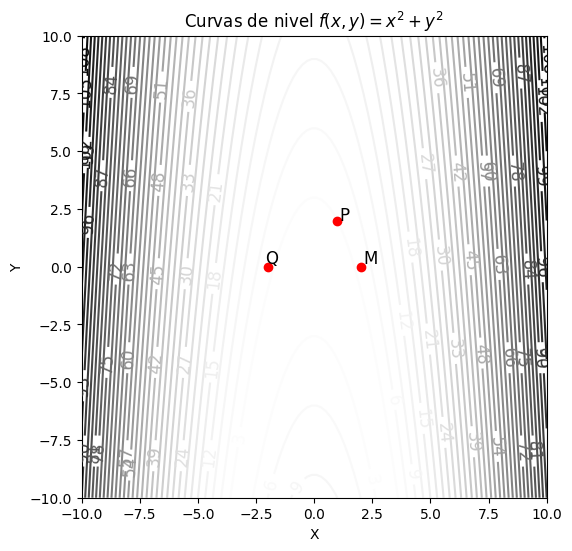

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(-10, 10, 100)
y = np.linspace(-10, 10, 100)
X, Y = np.meshgrid(x, y)
Fx = 2*X
Fy = 2*Y

fig,ax=plt.subplots(1,1,figsize=(6,6))
contour=ax.contour(X, Y, np.abs(X**2 + Y), levels=36, cmap="Greys")
ax.clabel(contour, inline=True, fontsize=12)
ax.plot(1,2,'ro')
ax.text(1.1,2,'P',size=12)
ax.plot(-2,0,'ro')
ax.text(-2.1,0.15,'Q',size=12)
ax.plot(2,0,'ro')
ax.text(2.1,0.15,'M',size=12)
#plt.quiver(X, Y, Fx, Fy, color='black', scale=10)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_title('Curvas de nivel $f(x,y) = x^2 + y^2$')
plt.show()


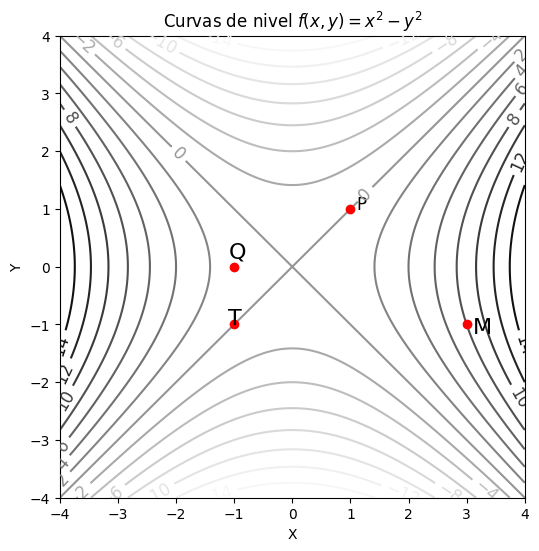

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(-4, 4, 1000)
y = np.linspace(-4, 4, 1000)
X, Y = np.meshgrid(x, y)
Fx = 2*X
Fy = 2*Y

fig,ax=plt.subplots(1,1,figsize=(6,6))
contour=ax.contour(X, Y, X**2 - Y**2, levels=18, cmap="Greys")
ax.clabel(contour, inline=True, fontsize=12)
ax.plot(1,1,'ro')
ax.text(1.1,1,'P',size=12)
ax.plot(-1,0,'ro')
ax.text(-1.1,0.15,'Q',size=16)
ax.plot(3,-1,'ro')
ax.text(3.1,-1.15,'M',size=16)
ax.plot(-1,-1,'ro')
ax.text(-1.1,-1,'T',size=16)
#plt.quiver(X, Y, Fx, Fy, color='black', scale=10)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_title('Curvas de nivel $f(x,y) = x^2 - y^2$')
plt.show()


Propósito: Visualizar cómo el ángulo entre el vector gradiente y otro vector dirección afecta la derivada direccional.
Gráfico: Un punto
𝑃
(
𝑥
0
,
𝑦
0
)
P(x
0
​
 ,y
0
​
 ) con el vector
∇
𝑓
∇f y otro vector
𝑣
v formando un ángulo
𝜃
θ.
Interpretación: Si
𝑣
v está alineado con el gradiente, el crecimiento es máximo; si es perpendicular, la derivada direccional es 0.

In [ ]:
import numpy as np

plt.figure(figsize=(6,6))
origin = np.array([1, 1])  # Punto P
grad = np.array([2, 1])    # Gradiente en P
v1 = np.array([1, 2])      # Un vector dirección
v2 = np.array([-1, -0.5])  # Otro vector dirección (opuesto)

plt.quiver(*origin, *grad, color='red', angles='xy', scale_units='xy', scale=1, label='Gradiente')
plt.quiver(*origin, *v1, color='blue', angles='xy', scale_units='xy', scale=1, label='Vector dirección 1')
plt.quiver(*origin, *v2, color='green', angles='xy', scale_units='xy', scale=1, label='Vector dirección 2')

plt.xlim(0, 3)
plt.ylim(0, 3)
plt.axhline(0, color='black',linewidth=0.5)
plt.axvline(0, color='black',linewidth=0.5)
plt.grid()
plt.legend()
plt.title("Relación entre Gradiente y Derivada Direccional")
plt.show()


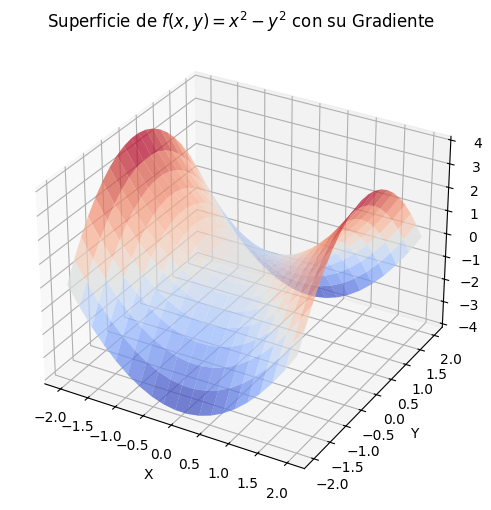

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')

X = np.linspace(-2, 2, 20)
Y = np.linspace(-2, 2, 20)
X, Y = np.meshgrid(X, Y)
Z = X**2 - Y**2

ax.plot_surface(X, Y, Z, cmap='coolwarm', alpha=0.7)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('f(x, y)')
ax.set_title("Superficie de $f(x,y) = x^2 - y^2$ con su Gradiente")

plt.show()


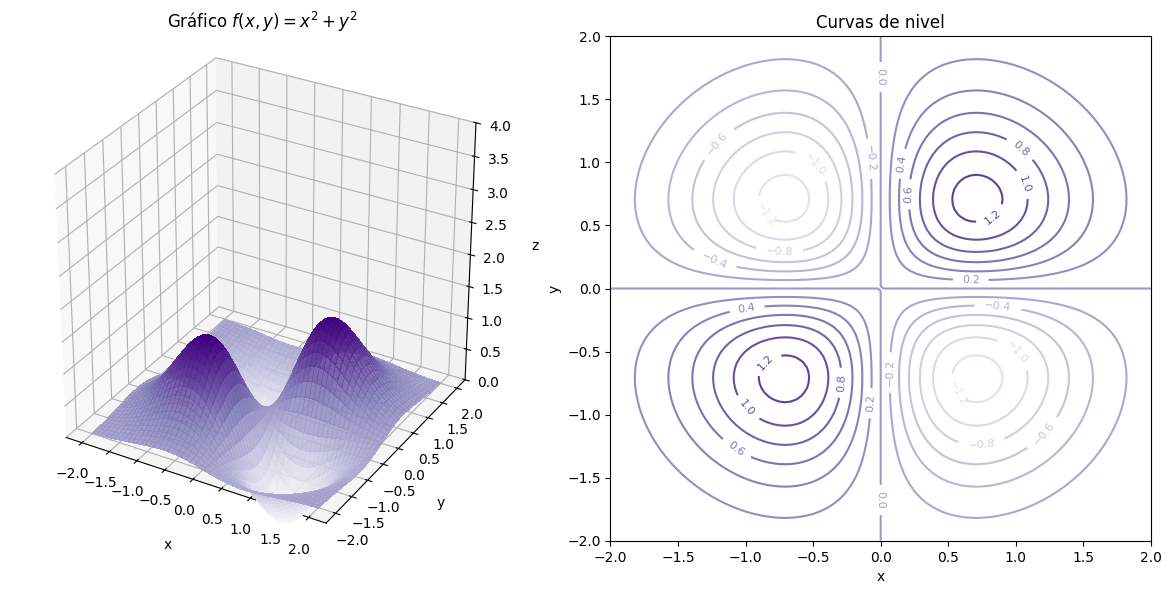

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Definir la función
def f(x, y):
  return 7*x*y/np.exp((x**2 + y**2))
   # return x**2 + y**2

# Crear la malla de valores
x = np.linspace(-2, 2, 100)
y = np.linspace(-2, 2, 100)
X, Y = np.meshgrid(x, y)
Z = f(X, Y)
#Z_cut = np.where(Z > 4, np.nan, Z)  # cortar en altura
Z_cut=Z
# Crear figura con dos subplots
fig = plt.figure(figsize=(12, 6))

# ===== Panel 1: Superficie 3D =====
ax1 = fig.add_subplot(1, 2, 1, projection='3d')
surf = ax1.plot_surface(X, Y, Z_cut, cmap='Purples', alpha=0.85, edgecolor='none', antialiased=False)

ax1.set_box_aspect([1, 1, 1])
ax1.set_zlim([0, 4])
ax1.set_xlabel('x', labelpad=10)
ax1.set_ylabel('y', labelpad=10)
ax1.set_zlabel('z', labelpad=10)
ax1.set_title(r'Gráfico $f(x, y) = x^2 + y^2$', fontsize=12)

# ===== Panel 2: Curvas de nivel =====
ax2 = fig.add_subplot(1, 2, 2)
contour = ax2.contour(X, Y, Z, levels=14, cmap='Purples', vmin=-2, vmax=2)  # usar misma escala de color
ax2.clabel(contour, inline=True, fontsize=8)

ax2.set_xlabel('x')
ax2.set_ylabel('y')
ax2.set_title('Curvas de nivel', fontsize=12)
#cbar = fig.colorbar(contour, ax=ax2, orientation='vertical')
#cbar.set_label('Altura (z)')

plt.tight_layout()
plt.show()


In [ ]:
py

-1.5

<ipython-input-82-e78366c53bab>:6: RuntimeWarning: invalid value encountered in log
  return np.log(2*(x**2)*y-y*x)/(x**2+y**2)


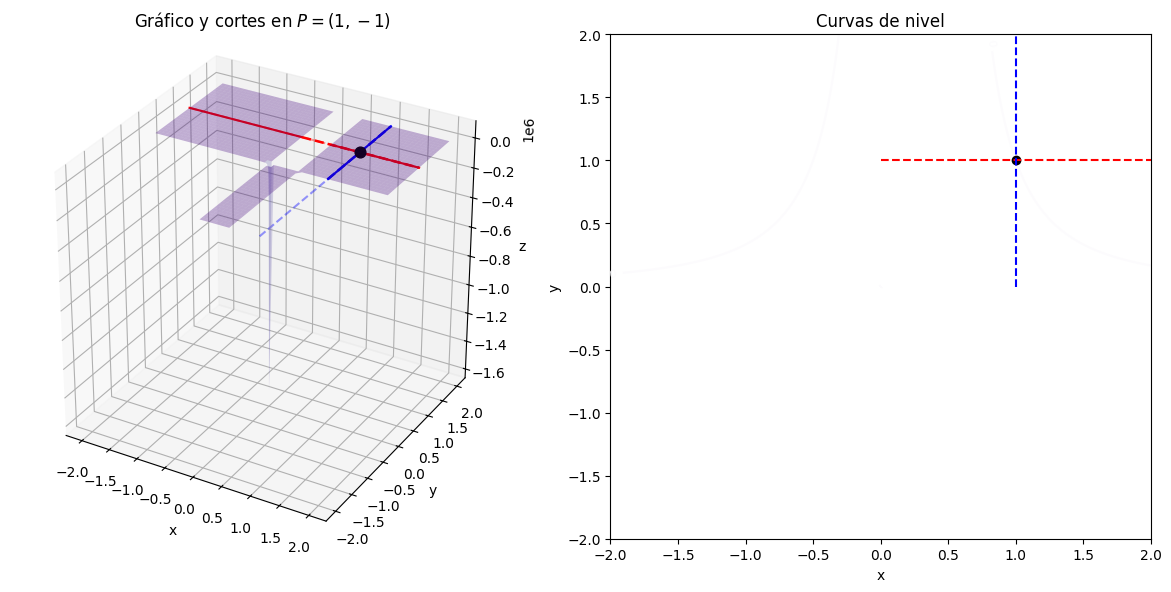

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Función
def f(x, y):
    return x**2 + y**2

# Punto de interés
px, py = 1, 1
pz = f(px, py)

# Mallas
x = np.linspace(-2, 2, 1000)
y = np.linspace(-2, 2, 1000)
X, Y = np.meshgrid(x, y)
Z = f(X, Y)
#Z_cut = np.where(Z > 4, np.nan, Z)
Z_cut=Z
# Cortes en planos x=1 y y=1
x_corte = np.linspace(-2, 2, 200)
z_corte_y = f(x_corte, py)  # plano y = 1

y_corte = np.linspace(-2, 2, 200)
z_corte_x = f(px, y_corte)  # plano x = 1

# Derivadas parciales en el punto (1,1)
dfdx = 2 * px
dfdy = 2 * py

# Rectas tangentes en x y en y (alrededor de px, py)
x_tan = np.linspace(px - 1, px + 1, 50)
z_tan_x = f(px, py) + dfdx * (x_tan - px)

y_tan = np.linspace(py - 1, py + 1, 50)
z_tan_y = f(px, py) + dfdy * (y_tan - py)

# --- FIGURA
fig = plt.figure(figsize=(12, 6))

# Panel 1: superficie 3D
ax1 = fig.add_subplot(1, 2, 1, projection='3d')
ax1.plot_surface(X, Y, Z_cut, cmap='Purples', alpha=0.3, edgecolor='none',zorder=-1)

# Punto sobre la superficie
ax1.scatter(px, py, pz, color='black', s=60, label=r'$P = (1,1,2)$',zorder=1)

# Cortes en planos coordenados
ax1.plot(x_corte, [py]*len(x_corte), z_corte_y, color='red', label=r'Plano $y=1$')
ax1.plot([px]*len(y_corte), y_corte, z_corte_x, color='blue', label=r'Plano $x=1$')

# Rectas tangentes en 3D (punteadas)
ax1.plot(x_tan, [py]*len(x_tan), z_tan_x, 'r--', lw=1.8, label='Tangente ∂f/∂x')
ax1.plot([px]*len(y_tan), y_tan, z_tan_y, 'b--', lw=1.8, label='Tangente ∂f/∂y')

# Línea (x=1, z=0) sobre plano base
ax1.plot([px]*len(y), y, [0]*len(y), color='blue', alpha=0.4, lw=1.5, linestyle='--')

# Línea (y=1, z=0) sobre plano base
ax1.plot(x, [py]*len(x), [0]*len(x), color='red', alpha=0.4, lw=1.5, linestyle='--')

ax1.set_box_aspect([1, 1, 1])
#ax1.set_zlim([0, 4])
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.set_zlabel('z')
ax1.set_title(r'Gráfico y cortes en $P=(1,-1)$')
#ax1.legend(loc='upper left')

# Panel 2: curvas de nivel
ax2 = fig.add_subplot(1, 2, 2)
contour = ax2.contour(X, Y, Z, levels=7, cmap='Purples', vmin=0, vmax=4)  # usar misma escala de color
ax2.clabel(contour, inline=True, fontsize=8)



# Punto proyectado
ax2.plot(px, py, 'ko', label='P = (1,-1)')

# Rectas tangentes proyectadas (en direcciones x e y)
ax2.plot(x_tan, [py]*len(x_tan), 'r--', lw=1.5)
ax2.plot([px]*len(y_tan), y_tan, 'b--', lw=1.5)

ax2.set_xlabel('x')
ax2.set_ylabel('y')
ax2.set_title('Curvas de nivel', fontsize=12)

plt.tight_layout()
plt.show()


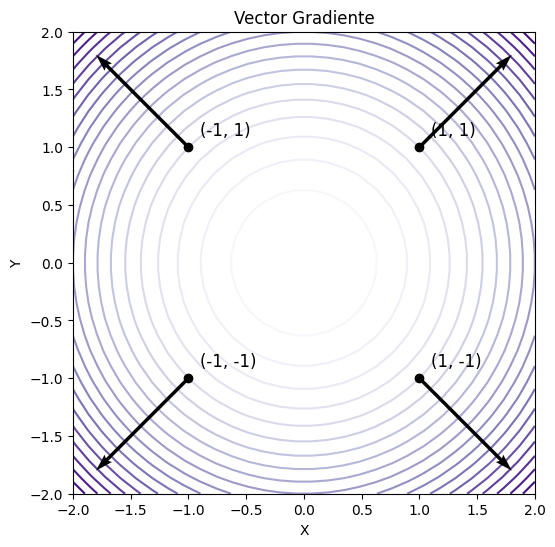

In [ ]:
# Calcular derivadas parciales
fx = lambda x, y: 2*x
fy = lambda x, y: 2*y

# Seleccionar puntos para visualizar gradientes
points_x = np.array([-1, 1, -1, 1])
points_y = np.array([-1, -1, 1, 1])
points_z = f(points_x, points_y)

# Gradientes en cada punto
grad_x = fx(points_x, points_y)
grad_y = fy(points_x, points_y)

# Graficar con quiver
fig, ax = plt.subplots(figsize=(6,6))
ax.contour(X, Y, Z, levels=20, cmap="Purples",zorder=-1)
ax.plot(points_x,points_y,'ko')
ax.quiver(points_x, points_y, grad_x, grad_y, color='k', scale=10,zorder=1)

# Etiquetas con coordenadas
for x0, y0 in zip(points_x, points_y):
    ax.text(x0 + 0.1, y0 + 0.1, f"({x0}, {y0})", fontsize=12, color='black',zorder=1)

ax.set_aspect('equal')

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_title('Vector Gradiente')

plt.show()


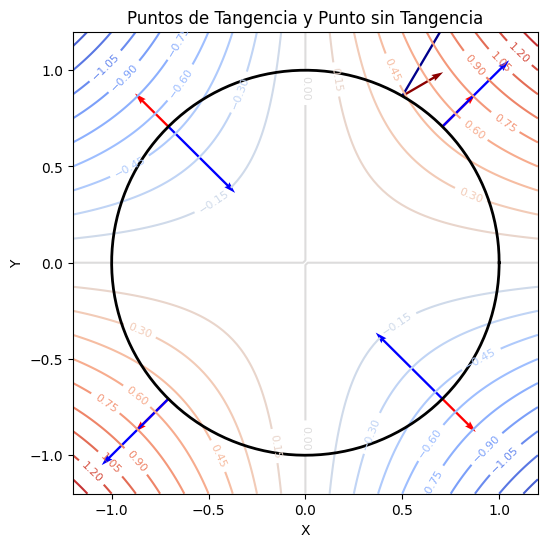

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Definir la función objetivo y la restricción
def f(x, y):
    return x * y  # Función a optimizar

def g(x, y):
    return x**2 + y**2 - 1  # Restricción (circunferencia de radio 1)

# Crear malla de valores
x = np.linspace(-1.2, 1.2, 100)
y = np.linspace(-1.2, 1.2, 100)
X, Y = np.meshgrid(x, y)
Z_f = f(X, Y)

# Gradientes
fx, fy = Y, X  # ∇f = (y, x)
gx, gy = 2*X, 2*Y  # ∇g = (2x, 2y)

# Puntos de tangencia (soluciones óptimas)
sol_points = [(1/np.sqrt(2), 1/np.sqrt(2)), (-1/np.sqrt(2), -1/np.sqrt(2)),
              (1/np.sqrt(2), -1/np.sqrt(2)), (-1/np.sqrt(2), 1/np.sqrt(2))]

# Punto adicional en la restricción que NO es tangente
extra_point = (0.5, np.sqrt(1 - 0.5**2))  # Un punto cualquiera sobre la circunferencia

# Crear figura
fig, ax = plt.subplots(figsize=(6,6))

# Dibujar curvas de nivel de f(x,y)
contour = ax.contour(X, Y, Z_f, levels=20, cmap="coolwarm")
ax.clabel(contour, inline=True, fontsize=8)

# Dibujar la restricción g(x,y) = 0 (circunferencia)
theta = np.linspace(0, 2*np.pi, 300)
x_circ, y_circ = np.cos(theta), np.sin(theta)
ax.plot(x_circ, y_circ, 'k-', linewidth=2, label="Restricción $g(x,y) = 0$")

# Dibujar gradientes en los puntos de tangencia
for px, py in sol_points:
    ax.quiver(px, py, fx[int(50 + px*50), int(50 + py*50)], fy[int(50 + px*50), int(50 + py*50)],
              color='red', angles='xy', scale_units='xy', scale=5, width=0.005, label="∇f (Tangencia)")
    ax.quiver(px, py, gx[int(50 + px*50), int(50 + py*50)], gy[int(50 + px*50), int(50 + py*50)],
              color='blue', angles='xy', scale_units='xy', scale=5, width=0.005, label="∇g (Tangencia)")

# Dibujar gradientes en el punto adicional (sin tangencia)
px, py = extra_point
ax.quiver(px, py, fy[int(50 + px*50), int(50 + py*50)], fx[int(50 + px*50), int(50 + py*50)],
          color='darkred', angles='xy', scale_units='xy', scale=5, width=0.005, label="∇f (Sin tangencia)")
ax.quiver(px, py, gy[int(50 + px*50), int(50 + py*50)], gx[int(50 + px*50), int(50 + py*50)],
          color='darkblue', angles='xy', scale_units='xy', scale=5, width=0.005, label="∇g (Sin tangencia)")

# Formato gráfico
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_title("Puntos de Tangencia y Punto sin Tangencia")
#ax.legend()

plt.show()


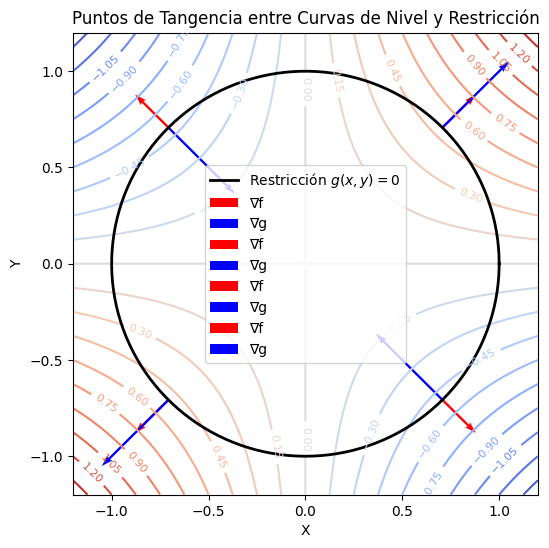

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Definir la función objetivo y la restricción
def f(x, y):
    return x * y  # Función a optimizar

def g(x, y):
    return x**2 + y**2 - 1  # Restricción (circunferencia de radio 1)

# Crear malla de valores
x = np.linspace(-1.2, 1.2, 100)
y = np.linspace(-1.2, 1.2, 100)
X, Y = np.meshgrid(x, y)
Z_f = f(X, Y)

# Gradientes
fx, fy = Y, X  # ∇f = (y, x)
gx, gy = 2*X, 2*Y  # ∇g = (2x, 2y)

# Puntos solución (donde las curvas de nivel son tangentes a la restricción)
sol_points = [(1/np.sqrt(2), 1/np.sqrt(2)), (-1/np.sqrt(2), -1/np.sqrt(2)),
              (1/np.sqrt(2), -1/np.sqrt(2)), (-1/np.sqrt(2), 1/np.sqrt(2))]

# Crear figura
fig, ax = plt.subplots(figsize=(6,6))

# Dibujar curvas de nivel de f(x,y)
contour = ax.contour(X, Y, Z_f, levels=20, cmap="coolwarm")
ax.clabel(contour, inline=True, fontsize=8)

# Dibujar la restricción g(x,y) = 0 (circunferencia)
theta = np.linspace(0, 2*np.pi, 300)
x_circ, y_circ = np.cos(theta), np.sin(theta)
ax.plot(x_circ, y_circ, 'k-', linewidth=2, label="Restricción $g(x,y) = 0$")

# Dibujar gradientes en la restricción
for px, py in sol_points:
    ax.quiver(px, py, fx[int(50 + px*50), int(50 + py*50)], fy[int(50 + px*50), int(50 + py*50)],
              color='red', angles='xy', scale_units='xy', scale=5, width=0.005, label="∇f")
    ax.quiver(px, py, gx[int(50 + px*50), int(50 + py*50)], gy[int(50 + px*50), int(50 + py*50)],
              color='blue', angles='xy', scale_units='xy', scale=5, width=0.005, label="∇g")

# Formato gráfico
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_title("Puntos de Tangencia entre Curvas de Nivel y Restricción")
ax.legend()

plt.show()


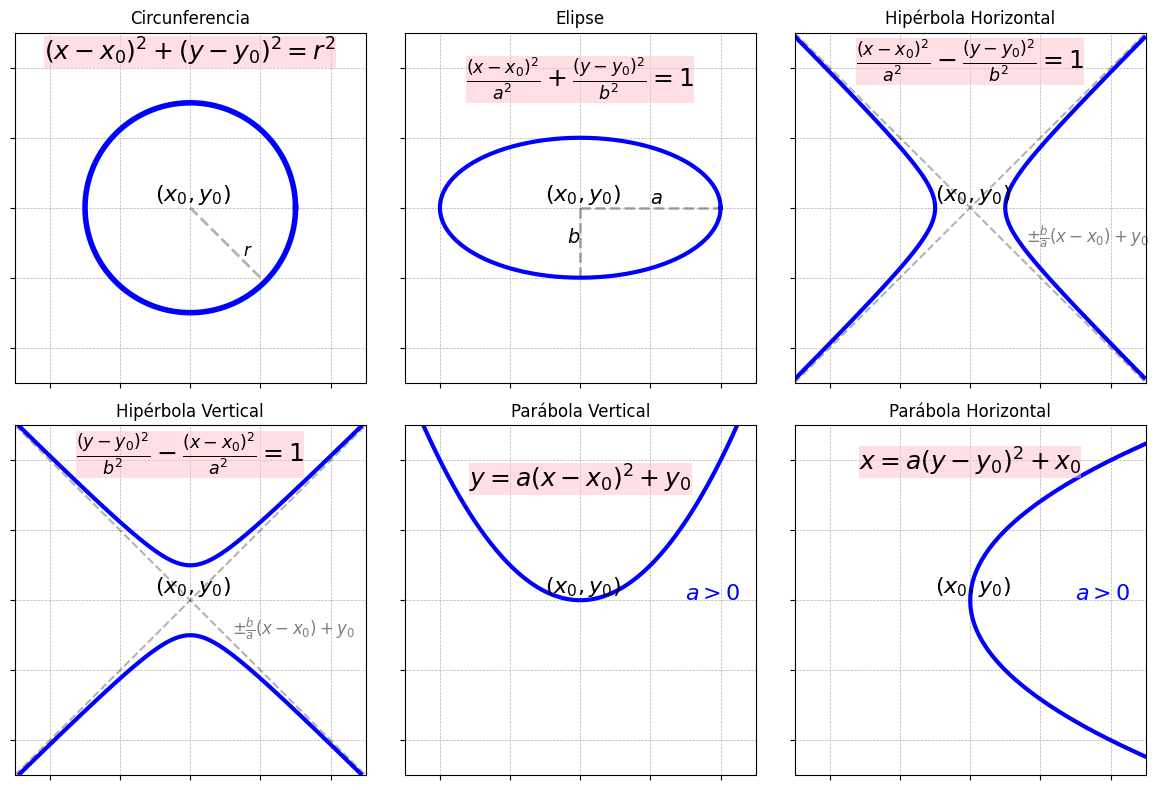

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def plot_conic_sections():
  #with plt.xkcd():
    fig, axes = plt.subplots(2, 3, figsize=(12, 8))
    x0, y0 = 0, 0  # Centro común
    r = 3  # Radio de la circunferencia
    a, b = 4, 2  # Semiejes de la elipse
    x = np.linspace(-5, 5, 400)
    y = np.linspace(-5, 5, 400)
    X, Y = np.meshgrid(x, y)

    bbox={"fc": "pink", "pad": 0,'edgecolor':'none','alpha': 0.5}

    # Circunferencia
    theta = np.linspace(0, 2*np.pi, 300)
    axes[0, 0].plot(x0 + r*np.cos(theta), y0 + r*np.sin(theta),'b',lw=4)
    axes[0, 0].set_title("Circunferencia")
    #axes[0, 0].vlines(x=0,ymin=0,ymax=r, color='black', linewidth=0.5)
    axes[0, 0].plot([x0, x0 + r*np.cos(-np.pi/4)], [y0, y0+ r*np.sin(-np.pi/4)], 'k--', lw=2,alpha=0.3)  # Línea de radio
    axes[0, 0].text(x0 + r/2, y0-r/2, '$r$', fontsize=12, verticalalignment='bottom')
    axes[0, 0].annotate('$(x_0, y_0)$',xy=(0,0),xytext=(-1,0.2),fontsize=16)
    axes[0, 0].text(0,4, '$(x - x_0)^2 + (y - y_0)^2 = r^2$', fontsize=18, verticalalignment='bottom',ha="center",bbox=bbox)



    # Elipse
    axes[0, 1].plot(x0 + a*np.cos(theta), y0 + b*np.sin(theta),color='b',lw=3)
    axes[0, 1].set_title("Elipse")
    axes[0, 1].plot([x0, x0 + a], [y0, y0], 'k--', lw=2,alpha=0.3)  # Línea del semieje mayor
    axes[0, 1].plot([x0, x0], [y0, y0 - b], 'k--', lw=2, alpha=0.3)  # Línea del semieje menor
    axes[0, 1].text(x0 + a/2, y0, '$a$', fontsize=14, verticalalignment='bottom')
    axes[0, 1].text(x0, y0 - b/2, '$b$', fontsize=14, horizontalalignment='right')
    axes[0, 1].annotate('$(x_0, y_0)$',xy=(0,0),xytext=(-1,0.2),fontsize=16)
    axes[0, 1].text(0,3, r'$\frac{(x - x_0)^2}{a^2} + \frac{(y - y_0)^2}{b^2} = 1$', fontsize=18, verticalalignment='bottom',ha="center",bbox=bbox)


    # Hipérbola horizontal
    a,b=1,1
    axes[0, 2].contour(X, Y, X**2/a**2 - Y**2/b**2, levels=[1],colors='b',linewidths=3)
    axes[0, 2].set_title("Hipérbola Horizontal")
    axes[0, 2].plot(x, (b/a) * (x - x0) + y0, 'k--',alpha=0.3)
    axes[0, 2].plot(x, -(b/a) * (x - x0) + y0, 'k--',alpha=0.3)
    axes[0, 2].annotate('$(x_0, y_0)$',xy=(0,0),xytext=(-1,0.2),fontsize=16)
    axes[0, 2].text(0,3.5, r'$\frac{(x - x_0)^2}{a^2} - \frac{(y - y_0)^2}{b^2} = 1$', fontsize=18, verticalalignment='bottom',ha="center",bbox=bbox)
    axes[0, 2].annotate(r'$\pm \frac{b}{a}(x-x_0)+y_0$',xy=(1.6,-1),fontsize=12,color='k',alpha=0.5)

    # Hipérbola vertical
    axes[1, 0].contour(X, Y, Y**2/b**2 - X**2/a**2, levels=[1], colors='b',linewidths=3)
    axes[1, 0].set_title("Hipérbola Vertical")
    axes[1, 0].plot(x, (b/a) * (x - x0) + y0, 'k--',alpha=0.3)
    axes[1, 0].plot(x, -(b/a) * (x - x0) + y0, 'k--',alpha=0.3)
    axes[1, 0].annotate('$(x_0, y_0)$',xy=(0,0),xytext=(-1,0.2),fontsize=16)
    axes[1, 0].text(0,3.5, r'$\frac{(y - y_0)^2}{b^2} - \frac{(x - x_0)^2}{a^2} = 1$', fontsize=18, verticalalignment='bottom',ha="center",bbox=bbox)
    axes[1, 0].annotate(r'$\pm \frac{b}{a}(x-x_0)+y_0$',xy=(1.2,-1),fontsize=12,color='k',alpha=0.5)


    # Parábola vertical
    axes[1, 1].plot(x, x**2 / (4 * b), 'b',lw=3)
    axes[1, 1].set_title("Parábola Vertical")
    axes[1, 1].annotate('$(x_0, y_0)$',xy=(0,0),xytext=(-1,0.2),fontsize=16)
    axes[1, 1].text(0,3, r'$y = a(x-x_0)^2+y_0$', fontsize=18, verticalalignment='bottom',ha="center",bbox=bbox)
    axes[1, 1].annotate('$a > 0$',xy=(3,0),fontsize=16,color='b')

    # Parábola horizontal
    axes[1, 2].plot(y**2 / (4 * a), y, 'b',lw=3)
    axes[1, 2].set_title("Parábola Horizontal")
    axes[1, 2].annotate('$(x_0, y_0)$',xy=(0,0),xytext=(-1,0.2),fontsize=16)
    axes[1, 2].text(0,3.5, r'$x = a(y-y_0)^2+x_0$', fontsize=18, verticalalignment='bottom',ha="center",bbox=bbox)
    axes[1, 2].annotate('$a > 0$',xy=(3,0),fontsize=16,color='b')

    for ax in axes.flat:
        ax.set_xlim([-5, 5])
        ax.set_ylim([-5, 5])
        #ax.axhline(0, color='black', linewidth=0.5)
        #ax.axvline(0, color='black', linewidth=0.5)
        ax.grid(True, linestyle='--', linewidth=0.5)
        ax.set_xticklabels([])
        ax.set_yticklabels([])


    plt.tight_layout()
    plt.show()

plot_conic_sections()
